In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [25]:
df_region = pd.read_csv("data/lab2-airline-by-region-20231026.csv", encoding="cp949")
df_region.columns = ['지역', '시점', '도착출발', '운항_편', '여객_명', '화물_톤']
df_region.head(2)
df_region.info()
df_region.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      3790 non-null   object 
 1   시점      3790 non-null   float64
 2   도착출발    3790 non-null   object 
 3   운항_편    3790 non-null   int64  
 4   여객_명    3790 non-null   int64  
 5   화물_톤    3790 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 177.8+ KB


지역      0
시점      0
도착출발    0
운항_편    0
여객_명    0
화물_톤    0
dtype: int64

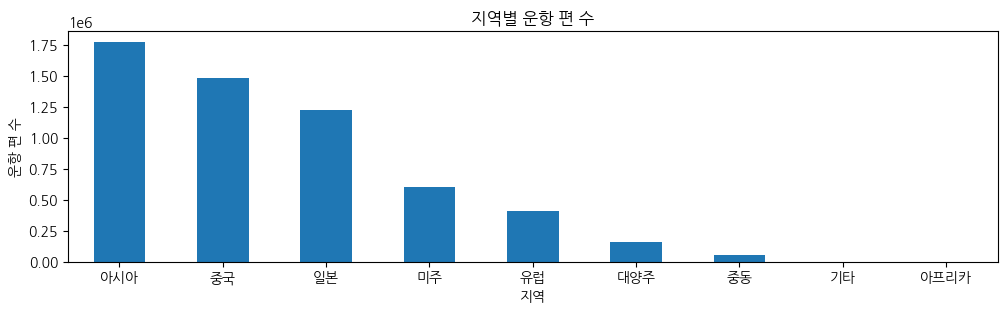

In [26]:
# 1. 지역별 운항 편 수 분석
region_flight_counts = df_region.groupby("지역")["운항_편"].sum().sort_values(ascending=False)
region_flight_counts.plot(kind="bar", figsize=(12, 3), rot=0)
plt.title("지역별 운항 편 수")
plt.xlabel("지역")
plt.ylabel("운항 편 수")
plt.show()

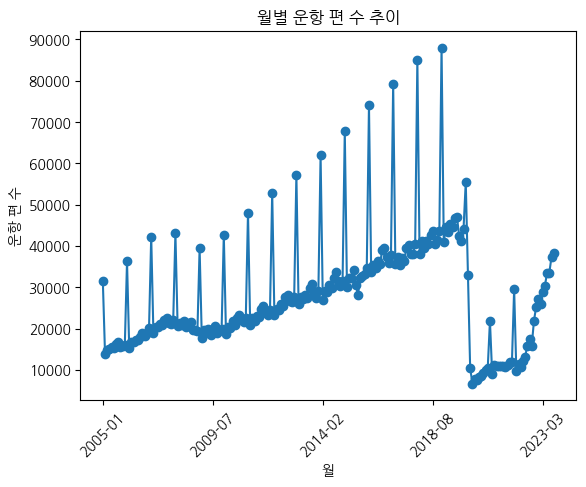

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
0,일본,2005-01-01,도착,1733,351340,16217,2005,1
1,일본,2005-01-01,출발,1736,379355,17319,2005,1
18,일본,2005-01-01,도착,2004,388373,20450,2005,1
19,일본,2005-01-01,출발,2001,395721,19973,2005,1
24,일본,2006-01-01,도착,1974,336596,18611,2006,1
...,...,...,...,...,...,...,...,...
3767,기타,2021-01-01,출발,18,1961,0,2021,1
3772,기타,2022-01-01,도착,14,1966,1,2022,1
3773,기타,2022-01-01,출발,14,1966,1,2022,1
3786,기타,2023-01-01,도착,0,0,0,2023,1


In [30]:
# 2. 월별 운항 편 수 추이 시각화
df_region["시점"] = pd.to_datetime(df_region["시점"].astype(str), format="mixed")
df_region["시점"]
df_region["연도"] = df_region["시점"].dt.year
df_region["월"] = df_region["시점"].dt.month
monthly_flight_counts = df_region.groupby(df_region["시점"].dt.strftime("%Y-%m"))["운항_편"].sum()
monthly_flight_counts.plot(kind="line", marker="o")
plt.title("월별 운항 편 수 추이")
plt.xlabel("월")
plt.ylabel("운항 편 수")
plt.xticks(rotation=45)
plt.show()
df_region[df_region["월"] == 1]

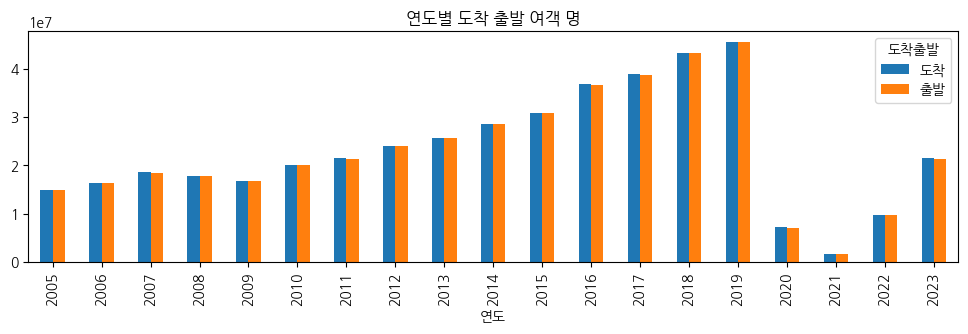

In [32]:
# 3. 도착 vs. 출발 운항 비교
arrival_vs_departure = df_region.groupby("도착출발")["운항_편"].sum()
pd.crosstab(index=df_region["도착출발"],
            columns=df_region["연도"],
            values=df_region["여객_명"], aggfunc="sum"
            ).T.plot(kind="bar", figsize=(12, 3), title="연도별 도착 출발 여객 명");

In [33]:
# 변경된 코드: groupby를 사용한 운항 편 수 집계
df_region.groupby(["도착출발", df_region["시점"].dt.year])["운항_편"].sum().unstack()

시점,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
도착출발,,,,,,,,,,,,,,,,,,,
도착,93138,106786,126510,124840,116205,128304,140261,156860,169496,183241,193987,219432,228553,248532,264078,83587,65591,91048,127454
출발,93269,106823,126527,124886,116281,128390,140310,156885,169493,183244,194027,219432,228550,248559,264165,83627,65859,91714,127602


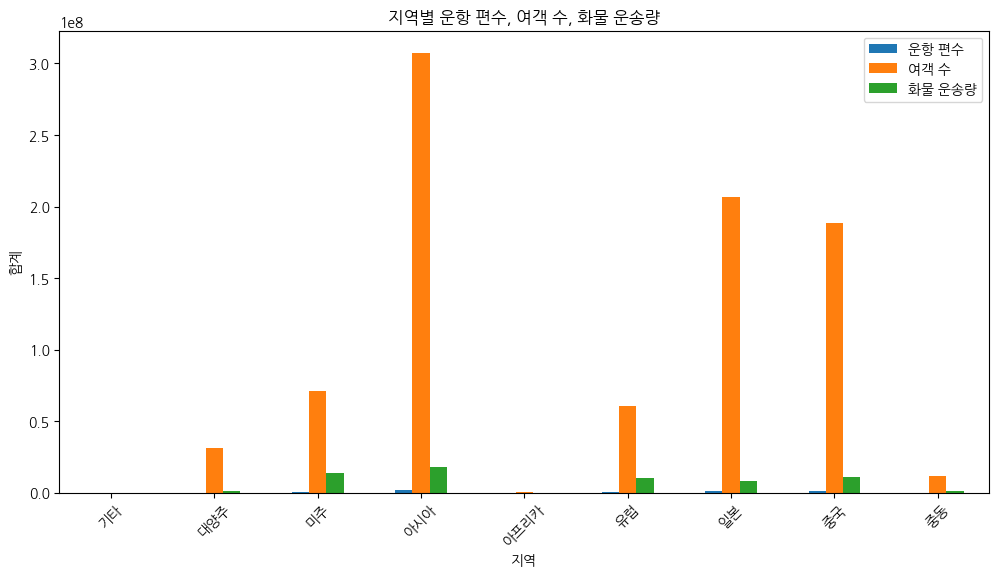

In [34]:
# "지역" 열을 기준으로 데이터 그룹화
grouped_by_region = df_region.groupby("지역")

# 각 지역별 운항 편수, 여객 수, 화물 운송량의 합계 계산
region_stats = grouped_by_region[["운항_편", "여객_명", "화물_톤"]].sum()

# 각 지역별 운항 편수, 여객 수, 화물 운송량의 합계를 막대 그래프로 시각화
region_stats.plot(kind="bar", figsize=(12, 6))
plt.title("지역별 운항 편수, 여객 수, 화물 운송량")
plt.xlabel("지역")
plt.ylabel("합계")
plt.xticks(rotation=45)
plt.legend(["운항 편수", "여객 수", "화물 운송량"])
plt.show()

In [35]:
year_region = pd.crosstab(index=df_region["연도"], columns=df_region["지역"],
            values=df_region["운항_편"], aggfunc="sum").fillna(0)
year_region.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,239,"3,836","26,937","47,148",0,"14,498","44,682","47,043","2,024"
2006,98,"4,313","29,170","53,355",1,"15,556","48,452","60,190","2,474"
2007,390,"4,610","29,987","65,485",0,"18,541","49,162","82,592","2,270"
2008,394,"5,511","28,627","63,791",2,"19,942","50,915","78,073","2,471"
2009,316,"5,399","27,719","56,168",0,"18,038","54,115","68,161","2,570"
2010,552,"6,119","29,616","64,018",3,"19,389","59,570","74,639","2,788"
2011,553,"8,250","30,001","79,046",4,"21,233","60,748","77,363","3,373"
2012,571,"9,631","29,845","92,740",173,"22,418","69,939","84,985","3,443"
2013,558,"10,718","30,551","101,289",540,"23,498","72,895","95,264","3,676"


<Axes: xlabel='연도'>

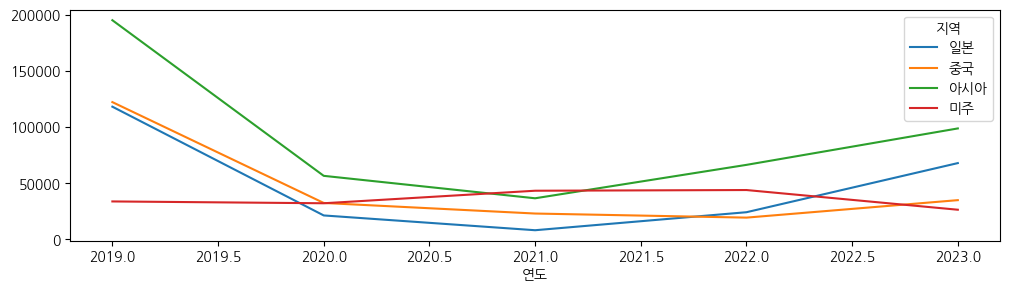

In [36]:
year_region.iloc[-5:][["일본", "중국", "아시아", "미주"]].plot(figsize=(12, 3))

<Axes: xlabel='연도'>

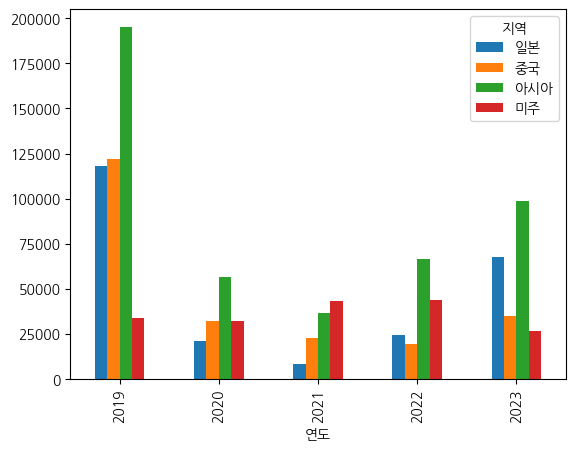

In [37]:
year_region.iloc[-5:][["일본", "중국", "아시아", "미주"]].plot(kind="bar")


<Axes: xlabel='지역'>

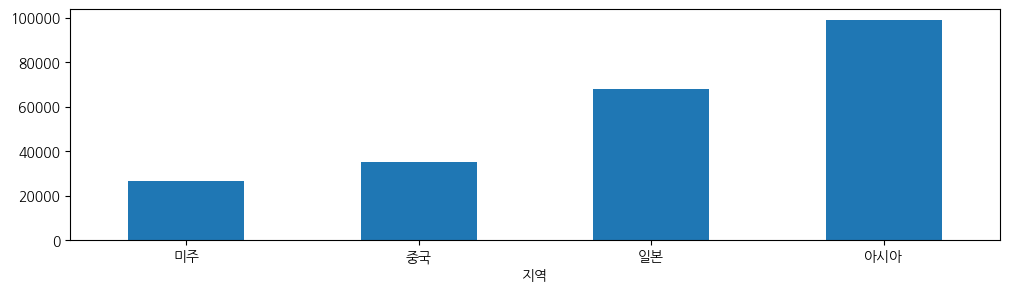

In [38]:
year_region.iloc[-1][["일본", "중국", "아시아", "미주"]].sort_values().plot(figsize=(12, 3), kind="bar", rot=0)


<Axes: xlabel='지역'>

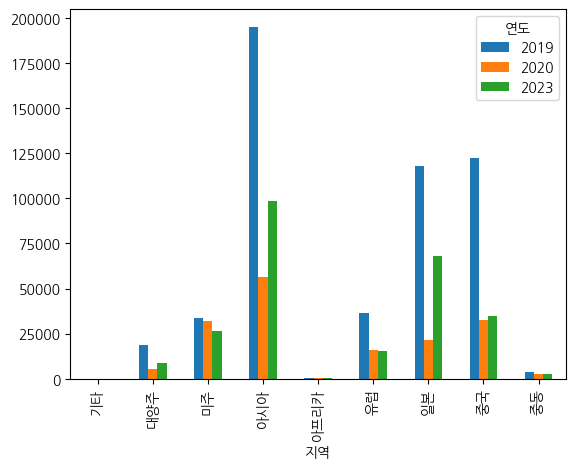

In [39]:
year_region.loc[[2019, 2020, 2023]].T.plot(kind="bar")


In [40]:
df_month = df_region[df_region["월"] == 3]
year_region_m = pd.crosstab(index=df_month["연도"], columns=df_month["지역"],
            values=df_month["운항_편"], aggfunc="sum").fillna(0)
year_region_m.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,2,313,"2,305","3,721",0,"1,148","3,702","3,493",106
2006,10,337,"2,365","4,229",0,"1,288","4,012","4,221",206
2007,13,365,"2,510","5,150",0,"1,459","4,135","6,600",172
2008,31,486,"2,385","5,645",0,"1,634","4,189","6,845",211
2009,31,453,"2,335","4,769",0,"1,536","4,419","5,888",202
2010,42,477,"2,453","5,028",0,"1,582","4,759","5,730",219
2011,36,654,"2,515","6,246",1,"1,687","5,234","5,937",277
2012,44,744,"2,464","7,339",0,"1,777","5,617","6,416",287
2013,44,886,"2,601","8,434",28,"1,996","6,206","7,237",318


In [41]:
df_month = df_region[df_region["월"] == 3]
year_region_m = pd.crosstab(index=df_month["연도"], columns=df_month["지역"],
            values=df_month["화물_톤"], aggfunc="sum").fillna(0)
year_region_m.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,0,"4,388","59,779","58,838",0,"34,039","38,935","30,794","1,078"
2006,2,"3,239","59,793","66,633",0,"39,541","41,263","33,850","2,641"
2007,23,"3,994","62,117","72,613",0,"44,163","40,915","45,098","2,571"
2008,20,"4,400","60,068","74,419",0,"47,006","39,126","48,495","2,511"
2009,4,"4,014","50,912","62,223",0,"40,654","31,571","44,492","2,039"
2010,0,"4,151","63,364","76,241",0,"49,501","41,849","56,967","2,983"
2011,0,"4,669","62,393","78,029",0,"49,416","39,903","54,933","3,970"
2012,0,"4,288","57,209","77,471",0,"49,157","39,146","48,379","3,792"
2013,0,"4,442","55,435","85,138",300,"47,073","38,308","52,814","5,755"


In [42]:
ym = pd.crosstab(df_region["연도"], df_region["월"], values=df_region["화물_톤"], aggfunc="sum")
ym.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2005,"439,982","189,806","227,851","215,802","214,137","220,238","219,941","212,933","218,616","232,295","225,219"
2006,"470,011","205,318","246,962","233,290","223,858","229,386","236,369","244,577","252,714","258,788","252,278"
2007,"513,716","227,449","271,494","258,874","255,134","258,581","264,433","267,857","268,333","281,406","271,056"
2008,"511,285","243,158","276,045","262,169","258,842","257,950","258,377","256,772","241,629","227,481","203,698"
2009,"462,055","203,417","235,909","225,882","228,466","229,167","245,843","248,691","252,931","273,570","266,542"
2010,"551,027","247,353","295,056","279,669","292,222","275,569","285,809","273,384","267,264","279,004","280,567"
2011,"550,473","241,652","293,313","268,976","263,154","265,960","281,886","271,326","262,018","265,806","273,534"
2012,"521,836","258,279","279,442","259,729","261,544","268,138","273,022","271,056","272,043","275,475","268,222"
2013,"540,180","233,405","289,265","269,272","268,718","266,946","270,297","274,628","267,180","286,109","280,258"
